# <h1>COMP2445 - Data Mining Assignment 2: 22005736<h1>

<strong>This dataset addresses the lack of public botnet datasets, especially for the IoT. It suggests *real* traffic data, gathered from 9 commercial IoT devices authentically infected by Mirai and BASHLITE.<strong>

<p>I found this data on the <a href='https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search='>UCI Machine Learning Repository.</a>

Number of variables –> attributes = 115
Number of rows -> instances - 7,062,606.
This is a categorical dataset, using clustering.
There are no missing values per variable.

In [1]:
import numpy as np
import pandas as pd

# Import Matplotlib
import matplotlib as mpl
# Import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 
import statistics
from scipy import stats
import scipy.cluster.hierarchy as shc

Matplotlib is building the font cache; this may take a moment.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
#Performance Metrics
from sklearn.metrics import silhouette_score

In [3]:
#Reads data file
df = pd.read_csv("Detection of IOT Botnet Attacks/Danmini_Doorbell/benign_traffic.csv")
df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000,1.000000,...,3.409505e+01,0.000000e+00,0.0,5.319895,344.262695,4.710446,344.262695,2.218830e+01,0.000000e+00,0.000000e+00
2,1.857879,360.458980,3.578934e+01,1.912127,360.275733,3.592397e+01,1.969807,360.091968,35.991542,1.996939,...,1.000815e+02,0.000000e+00,0.0,6.318264,347.703087,9.034660,347.703087,8.162508e+01,0.000000e+00,0.000000e+00
3,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,337.000000,0.000000,337.000000,0.000000e+00,0.000000e+00,0.000000e+00
4,1.680223,172.140917,1.848745e+04,1.793580,182.560279,1.892818e+04,1.925828,193.165753,19153.795810,1.992323,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49543,1.000000,102.000000,0.000000e+00,1.000000,102.000000,1.820000e-12,1.000009,101.999633,0.015405,2.270210,...,3.640000e-12,-1.570000e-30,0.0,4.218824,102.000000,0.000000,144.249783,1.820000e-12,5.970000e-23,0.000000e+00
49544,1.999976,102.000000,0.000000e+00,1.999986,102.000000,1.820000e-12,2.000004,101.999816,0.007702,3.270209,...,3.640000e-12,-1.580000e-44,0.0,4.218838,102.000000,0.000000,144.249783,3.640000e-12,-1.100000e-29,0.000000e+00
49545,2.999872,102.000000,3.640000e-12,2.999923,102.000000,1.820000e-12,2.999983,101.999878,0.005135,4.270206,...,0.000000e+00,-8.330000e-45,0.0,4.179949,102.000000,0.000002,144.249783,5.140000e-12,8.230000e-29,2.260000e-17
49546,3.999664,102.000000,3.640000e-12,3.999798,102.000000,0.000000e+00,3.999942,101.999908,0.003851,5.270200,...,3.640000e-12,4.980000e-69,0.0,4.219537,102.000000,0.000001,144.249783,1.820000e-12,5.960000e-29,0.000000e+00


# Attribute Information:
	-- The following describes each of the features headers:
		-- Stream aggregation:
			H: ("Source IP" in N-BaIoT paper) Stats summarizing the recent traffic from this packet's host (IP)
			MI: ("Source MAC-IP" in N-BaIoT paper) Stats summarizing the recent traffic from this packet's host (IP + MAC)
			HH: ("Channel" in N-BaIoT paper) Stats summarizing the recent traffic going from this packet's host (IP) to the packet's destination host.
			HH_jit: ("Channel jitter" in N-BaIoT paper) Stats summarizing the jitter of the traffic going from this packet's host (IP) to the packet's destination host.
			HpHp: ("Socket" in N-BaIoT paper) Stats summarizing the recent traffic going from this packet's host+port (IP) to the packet's destination host+port. Example 192.168.4.2:1242 -> 192.168.4.12:80
		-- Time-frame (The decay factor Lambda used in the damped window): 
			-- How much recent history of the stream is capture in these statistics
			-- L5, L3, L1, L0.1 and L0.01
		-- The statistics extracted from the packet stream:
			weight: The weight of the stream (can be viewed as the number of items observed in recent history)
			mean: ...
			std: ...
			radius: The root squared sum of the two streams' variances
			magnitude: The root squared sum of the two streams' means 
			cov: An approximated covariance between two streams
			pcc: An approximated correlation coefficient between two streams

# Exploratory Data Analysis

In [4]:
df.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,49548.000000,49548.000000,4.954800e+04,49548.000000,49548.000000,4.954800e+04,49548.000000,49548.000000,49548.000000,49548.000000,...,4.954800e+04,4.954800e+04,49548.000000,49548.000000,49548.000000,4.954800e+04,49548.000000,4.954800e+04,4.954800e+04,4.954800e+04
mean,2.256231,92.387127,1.989736e+01,2.288308,92.382667,2.549500e+01,2.422229,92.829655,67.670150,4.291791,...,8.968526e+00,1.806003e+00,0.000371,4.861666,92.338129,1.392164e-01,130.175018,9.643987e+00,2.138594e+00,1.775780e-03
std,1.453213,17.640932,3.591753e+02,1.469317,17.455677,3.770187e+02,1.505076,15.858976,436.114015,1.644405,...,2.919997e+02,7.661357e+01,0.013878,1.244585,17.928385,1.812241e+00,25.106333,2.914718e+02,8.120645e+01,2.521668e-02
min,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,-7.291934e+02,-0.142042,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,-6.899823e+02,-1.353522e-01
25%,1.000000,97.999999,0.000000e+00,1.000029,97.976892,1.820000e-12,1.031097,93.553006,0.000808,2.878704,...,4.550000e-13,-1.780000e-35,0.000000,4.219096,98.000000,6.740000e-07,138.592929,1.820000e-12,-4.650000e-29,-7.242500e-18
50%,1.951958,101.999737,5.410000e-08,1.984559,101.985794,3.430290e-04,1.999986,101.337645,1.160150,4.241541,...,1.820000e-12,1.515000e-85,0.000000,4.220188,102.000000,1.350000e-06,144.249783,3.640000e-12,1.530000e-30,0.000000e+00
75%,3.121032,102.000000,2.594240e-04,3.398511,102.000000,1.687128e-01,3.969432,101.999583,42.268658,5.602002,...,3.640000e-12,3.950000e-34,0.000000,5.308375,102.000000,1.910000e-06,144.249783,5.140000e-12,7.530000e-29,2.000000e-17
max,8.837730,360.458980,2.123254e+04,10.876876,360.275733,2.138792e+04,14.488665,360.091968,20362.325690,20.148226,...,1.088123e+04,4.381892e+03,0.767997,11.283089,354.000000,5.890428e+01,688.052324,1.088186e+04,4.393551e+03,7.754023e-01


In [5]:
df = df[["MI_dir_L5_weight","MI_dir_L5_mean","MI_dir_L3_weight","MI_dir_L3_mean","MI_dir_L1_weight","MI_dir_L1_mean","MI_dir_L1_variance","MI_dir_L0.1_weight","H_L5_mean", "H_L3_mean", "H_L1_mean","HpHp_L0.1_pcc","HpHp_L0.01_weight","HpHp_L0.01_mean","HpHp_L0.01_magnitude"]]

Some variables are very small (data with exponential signs - e), this data will be dropped since they are too small to have an impact.

In [6]:
df.mode()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,H_L5_mean,H_L3_mean,H_L1_mean,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_magnitude
0,1.0,102.0,1.0,102.0,1.0,102.0,0.00004,1.0,102.0,102.0,102.0,0.0,1.0,102.0,144.249783


In [7]:
df.dtypes

MI_dir_L5_weight        float64
MI_dir_L5_mean          float64
MI_dir_L3_weight        float64
MI_dir_L3_mean          float64
MI_dir_L1_weight        float64
MI_dir_L1_mean          float64
MI_dir_L1_variance      float64
MI_dir_L0.1_weight      float64
H_L5_mean               float64
H_L3_mean               float64
H_L1_mean               float64
HpHp_L0.1_pcc           float64
HpHp_L0.01_weight       float64
HpHp_L0.01_mean         float64
HpHp_L0.01_magnitude    float64
dtype: object

In [8]:
df.nunique()

MI_dir_L5_weight        22952
MI_dir_L5_mean          10139
MI_dir_L3_weight        29399
MI_dir_L3_mean          19543
MI_dir_L1_weight        37294
MI_dir_L1_mean          30136
MI_dir_L1_variance      35718
MI_dir_L0.1_weight      40386
H_L5_mean               10140
H_L3_mean               19544
H_L1_mean               30137
HpHp_L0.1_pcc            6200
HpHp_L0.01_weight       39911
HpHp_L0.01_mean           415
HpHp_L0.01_magnitude      444
dtype: int64

In [9]:
df.isnull().sum() #Checks for null values

MI_dir_L5_weight        0
MI_dir_L5_mean          0
MI_dir_L3_weight        0
MI_dir_L3_mean          0
MI_dir_L1_weight        0
MI_dir_L1_mean          0
MI_dir_L1_variance      0
MI_dir_L0.1_weight      0
H_L5_mean               0
H_L3_mean               0
H_L1_mean               0
HpHp_L0.1_pcc           0
HpHp_L0.01_weight       0
HpHp_L0.01_mean         0
HpHp_L0.01_magnitude    0
dtype: int64

<h3>Outlier Identification<h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x275508acd60>,
 'caps': [<matplotlib.lines.Line2D at 0x275508ad8a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x275508ac7c0>,
 'medians': [<matplotlib.lines.Line2D at 0x275508ae3e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x275508ae980>,
 'means': []}

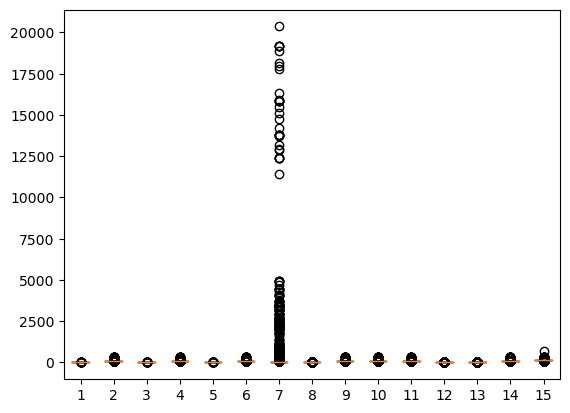

In [10]:
plt.boxplot(df)

In [11]:
z = np.abs(stats.zscore(df))
print(z)

       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L3_weight  MI_dir_L3_mean  \
0              0.864460        1.835927          0.876816        1.855155   
1              0.864460       14.830028          0.876816       14.987672   
2              0.274122       15.196168          0.256027       15.347200   
3              0.864460       13.866351          0.876816       14.013767   
4              0.396373        4.520997          0.336709        5.166143   
...                 ...             ...               ...             ...   
49543          0.864460        0.544924          0.876816        0.550963   
49544          0.176339        0.544924          0.196231        0.550963   
49545          0.511727        0.544924          0.484322        0.550963   
49546          1.199721        0.544924          1.164832        0.550963   
49547          1.886504        0.544924          1.844622        0.550963   

       MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
0           

In [12]:
threshold = 1
print(np.where(z > threshold))

(array([    0,     0,     0, ..., 49547, 49547, 49547], dtype=int64), array([1, 3, 5, ..., 2, 4, 7], dtype=int64))


In [13]:
df_clean = df[(z < threshold).all(axis=1)]

In [14]:
print(df.shape)
print(df_clean.shape)

(49548, 15)
(17466, 15)


In [15]:
df_clean.corr() #Comparing correlations to variables

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,H_L5_mean,H_L3_mean,H_L1_mean,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_magnitude
MI_dir_L5_weight,1.000000,0.550524,0.997747,0.517906,0.966539,0.478189,-0.193321,0.255381,0.550524,0.517906,0.478189,-0.003977,-0.675242,0.686579,0.686631
MI_dir_L5_mean,0.550524,1.000000,0.540171,0.965167,0.511077,0.700288,-0.329615,-0.166739,1.000000,0.965167,0.700288,0.009298,-0.755150,0.769203,0.769314
MI_dir_L3_weight,0.997747,0.540171,1.000000,0.499188,0.978487,0.454570,-0.167877,0.267746,0.540171,0.499188,0.454570,-0.003728,-0.680864,0.692295,0.692349
MI_dir_L3_mean,0.517906,0.965167,0.499188,1.000000,0.445594,0.827788,-0.511791,-0.186414,0.965167,1.000000,0.827788,0.003000,-0.657608,0.670024,0.670119
MI_dir_L1_weight,0.966539,0.511077,0.978487,0.445594,1.000000,0.361689,-0.063620,0.363982,0.511077,0.445594,0.361689,-0.000636,-0.675507,0.686749,0.686809
MI_dir_L1_mean,0.478189,0.700288,0.454570,0.827788,0.361689,1.000000,-0.870284,-0.234150,0.700288,0.827788,1.000000,-0.013193,-0.419726,0.426476,0.426533
MI_dir_L1_variance,-0.193321,-0.329615,-0.167877,-0.511791,-0.063620,-0.870284,1.000000,0.223555,-0.329615,-0.511791,-0.870284,0.017872,-0.022066,0.023615,0.023606
MI_dir_L0.1_weight,0.255381,-0.166739,0.267746,-0.186414,0.363982,-0.234150,0.223555,1.000000,-0.166739,-0.186414,-0.234150,-0.005942,0.175812,-0.179185,-0.179216
H_L5_mean,0.550524,1.000000,0.540171,0.965167,0.511077,0.700288,-0.329615,-0.166739,1.000000,0.965167,0.700288,0.009298,-0.755150,0.769203,0.769314
H_L3_mean,0.517906,0.965167,0.499188,1.000000,0.445594,0.827788,-0.511791,-0.186414,0.965167,1.000000,0.827788,0.003000,-0.657608,0.670024,0.670119


<Axes: >

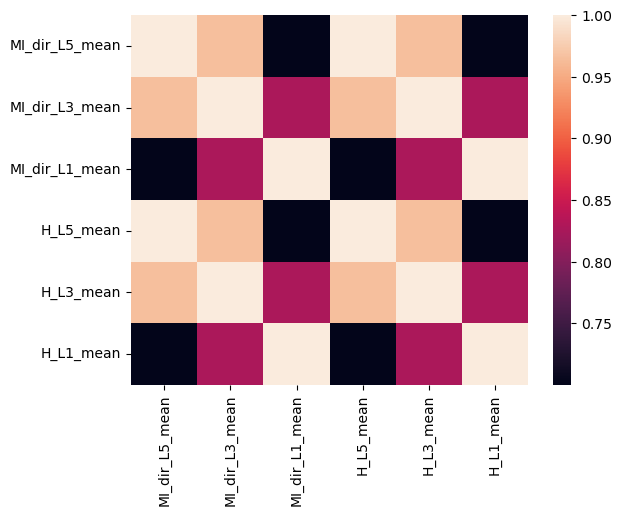

In [16]:
#Comparing means
mean = df_clean[['MI_dir_L5_mean','MI_dir_L3_mean','MI_dir_L1_mean','H_L5_mean','H_L3_mean','H_L1_mean']]
sns.heatmap(mean.corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x275521fc790>,
 'caps': [<matplotlib.lines.Line2D at 0x275521fcd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x275521fc640>],
 'medians': [<matplotlib.lines.Line2D at 0x275521fd240>],
 'fliers': [<matplotlib.lines.Line2D at 0x275521fd4e0>],
 'means': []}

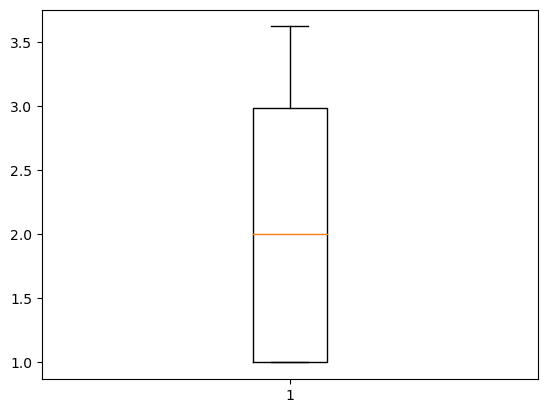

In [17]:
plt.boxplot(df_clean["MI_dir_L5_weight"])

{'whiskers': [<matplotlib.lines.Line2D at 0x27552247850>,
 'caps': [<matplotlib.lines.Line2D at 0x275534a4d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x275522475b0>],
 'medians': [<matplotlib.lines.Line2D at 0x27552247ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x275522801c0>],
 'means': []}

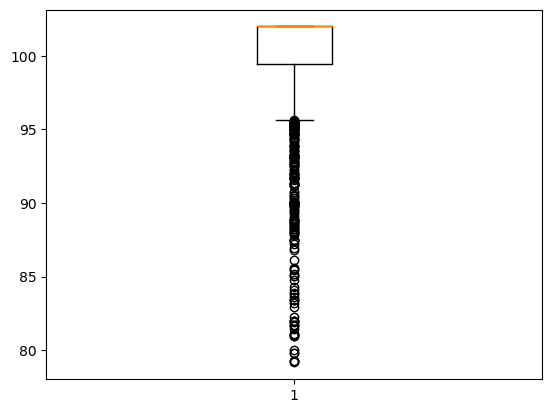

In [18]:
plt.boxplot(df_clean["MI_dir_L5_mean"])

{'whiskers': [<matplotlib.lines.Line2D at 0x275522c5ab0>,
 'caps': [<matplotlib.lines.Line2D at 0x275522c5ff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x275522c5810>,
 'medians': [<matplotlib.lines.Line2D at 0x275522c6530>,
 'fliers': [<matplotlib.lines.Line2D at 0x275522c67d0>,
 'means': []}

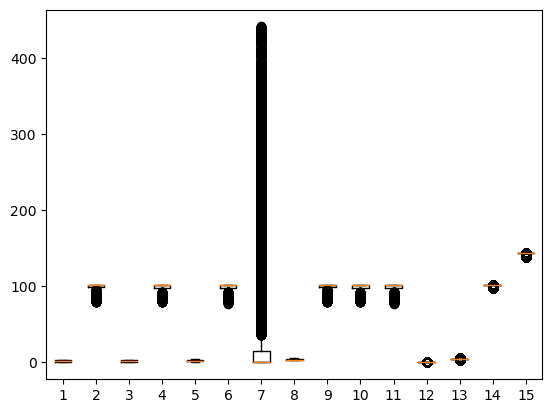

In [19]:
plt.boxplot(df_clean)

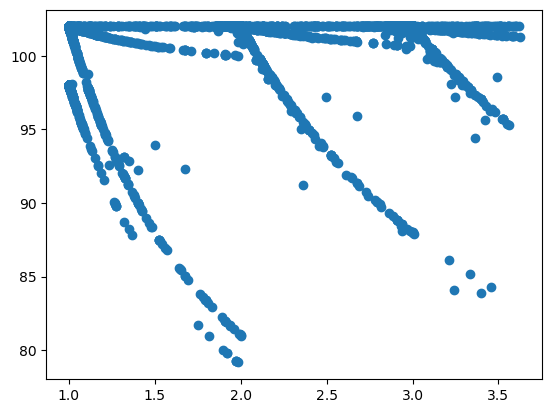

In [20]:
#Scatter plot creation
S = df_clean[['MI_dir_L5_weight','MI_dir_L5_mean']]
plt.scatter(S['MI_dir_L5_weight'],S['MI_dir_L5_mean'])

{'whiskers': [<matplotlib.lines.Line2D at 0x275523d75e0>,
 'caps': [<matplotlib.lines.Line2D at 0x275523d7b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x275523d7340>,
 'medians': [<matplotlib.lines.Line2D at 0x275524080a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x27552408340>,
 'means': []}

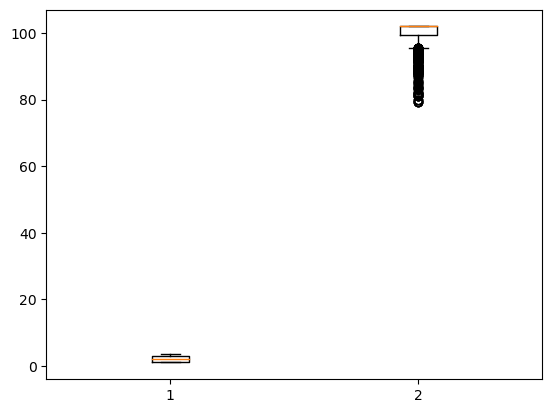

In [21]:
plt.boxplot(S)

<Axes: >

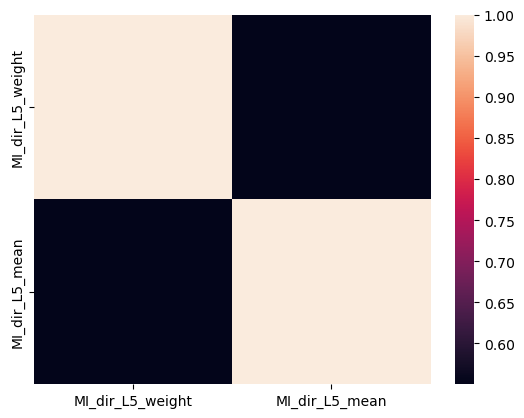

In [22]:
sns.heatmap(S.corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x275526682e0>,
 'caps': [<matplotlib.lines.Line2D at 0x27552668820>,
 'boxes': [<matplotlib.lines.Line2D at 0x27552668040>],
 'medians': [<matplotlib.lines.Line2D at 0x27552668d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x27552669000>],
 'means': []}

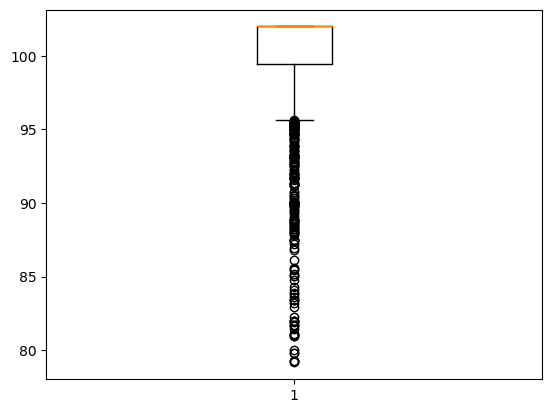

In [23]:
plt.boxplot(S['MI_dir_L5_mean'])

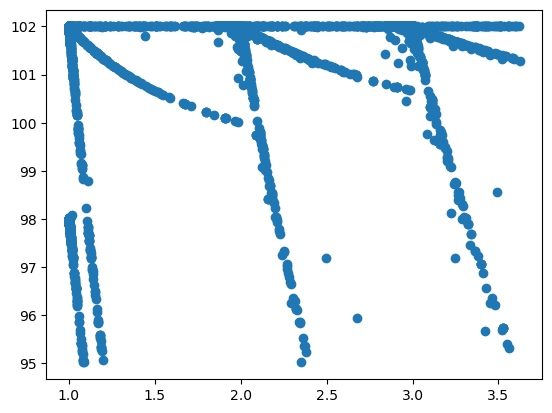

In [24]:
S = S.loc[(S.MI_dir_L5_mean > 95)] #Removing the outliers
plt.scatter(S['MI_dir_L5_weight'],S['MI_dir_L5_mean'])

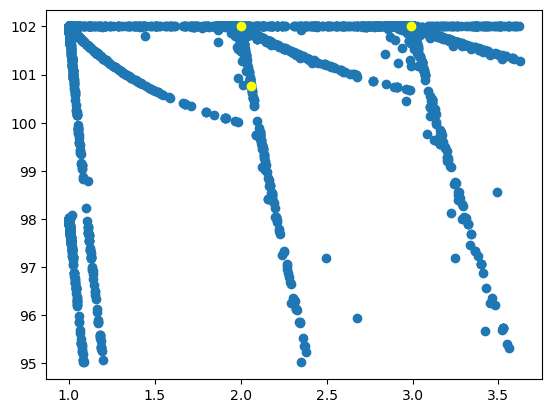

In [25]:
K=3
Centroids = (S.sample(n=K))
plt.scatter(S['MI_dir_L5_weight'],S['MI_dir_L5_mean'])
plt.scatter(Centroids['MI_dir_L5_weight'],Centroids['MI_dir_L5_mean'],c='yellow')
plt.show()

In [26]:
import numpy as np
diff = 1
j=0

while(diff!=0):
    XD=S
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['MI_dir_L5_weight']-row_d['MI_dir_L5_weight'])**2
            d2=(row_c['MI_dir_L5_mean']-row_d['MI_dir_L5_mean'])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        S[i]=ED
        i=i+1
    C=[]
    for index,row in S.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    S["Cluster"]=C
    Centroids_new = S.groupby(["Cluster"]).mean()[['MI_dir_L5_mean','MI_dir_L5_weight']]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['MI_dir_L5_mean'] - Centroids['MI_dir_L5_mean']).sum() + (Centroids_new['MI_dir_L5_weight'] - 
                                                                              Centroids['MI_dir_L5_weight']).sum()
        print(diff.sum())
    Centroids = S.groupby(["Cluster"]).mean()[['MI_dir_L5_mean','MI_dir_L5_weight']]

-0.2759023421287068
-0.0034539984500865373
0.0


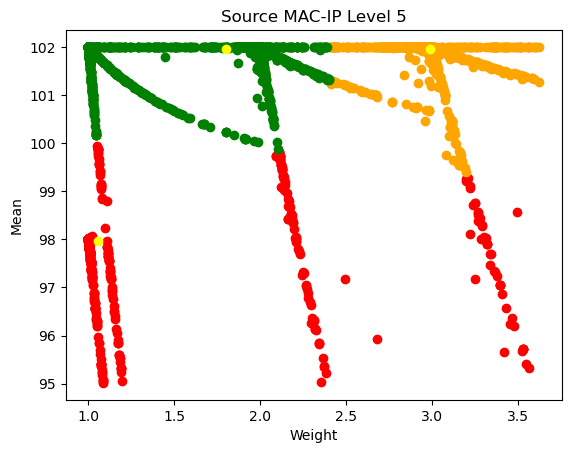

In [27]:
color=['red','orange','green']
for k in range(K):
    data=S[S["Cluster"]==k+1]
    plt.scatter(data['MI_dir_L5_weight'],data['MI_dir_L5_mean'],c=color[k])
plt.scatter(Centroids['MI_dir_L5_weight'],Centroids['MI_dir_L5_mean'],c='yellow')
plt.title("Source MAC-IP Level 5")
plt.xlabel("Weight")
plt.ylabel("Mean")
plt.show()

In [28]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df_clean)
df_scaled = pd.DataFrame(df_scaled, columns=df_clean.columns)
df_scaled.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,H_L5_mean,H_L3_mean,H_L1_mean,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_magnitude
0,0.003397,0.332921,0.003399,0.332928,0.003827,0.334448,0.005422,0.013886,0.332921,0.332928,0.334448,0.000000e+00,0.012870,0.332921,0.470821
1,0.006597,0.336466,0.006597,0.336466,0.006704,0.336257,0.000823,0.010441,0.336466,0.336466,0.336257,4.024402e-09,0.012028,0.326657,0.462528
2,0.006295,0.335599,0.006406,0.335599,0.006528,0.335451,0.006226,0.011500,0.335599,0.335599,0.335451,2.688086e-10,0.012443,0.328403,0.464909
3,0.003401,0.333276,0.003401,0.333276,0.003403,0.333216,0.002341,0.012169,0.333276,0.333276,0.333216,0.000000e+00,0.015293,0.333276,0.471324
4,0.006568,0.334977,0.006568,0.334977,0.006568,0.334977,0.000013,0.009942,0.334977,0.334977,0.334977,1.796396e-11,0.012761,0.329642,0.466571


In [29]:
#K-Means
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pd.DataFrame(df_scaled).describe()
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(df_scaled)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [30]:
kmeans.inertia_

232646.72977934702

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

Text(0, 0.5, 'Inertia')

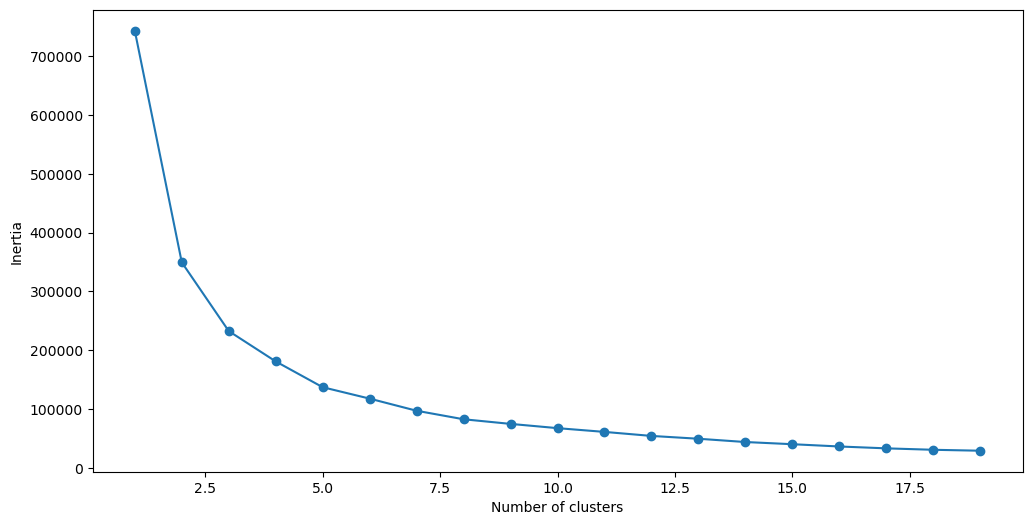

In [31]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [32]:
# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=20) #Random state - Exact same split every time the code is run
# Fit the KMeans model
km.fit(df_scaled)
pred = km.predict(df_scaled)
frame = pd.DataFrame(df_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    20233
1    18667
0    10648
Name: cluster, dtype: int64

In [33]:
# Calculate Silhoutte Score for K-Means
score = silhouette_score(df_scaled, km.labels_, metric='euclidean')
# Print the score
print("K-Means Clustering - Silhouette Score:",score)

K-Means Clustering - Silhouette Score: 0.5807487008528801


In [34]:
#Ecombee Thermostat
et = pd.read_csv("Detection of IOT Botnet Attacks/Ecobee_Thermostat/benign_traffic.csv")
et

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,...,1.020000e-07,0.000000e+00,0.000000,1.238636,106.146795,7.887770e+00,106.146795,6.221691e+01,0.000000e+00,0.000000e+00
2,1.724055,91.439104,249.441812,1.823878,92.454965,253.612868,1.937463,93.483558,255.733288,1.993563,...,0.000000e+00,0.000000e+00,0.000000,1.000000,78.000000,0.000000e+00,78.000000,0.000000e+00,0.000000e+00,0.000000e+00
3,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,...,2.740000e-07,0.000000e+00,0.000000,2.487473,341.959189,7.347919e+00,341.959189,5.399191e+01,0.000000e+00,0.000000e+00
4,2.516815,90.867308,150.827639,2.688981,91.541993,160.705060,2.888469,92.277536,169.944112,2.988463,...,9.999797e+01,0.000000e+00,0.000000,2.237519,98.930412,9.942635e+00,98.930412,9.885598e+01,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13108,1.021632,72.648557,2043.443501,1.100243,94.608573,8164.641469,1.464535,165.597474,21353.949970,2.011981,...,2.607515e+04,-1.622480e+03,-0.184540,8.631370,275.101729,2.207153e+02,374.849170,5.482214e+04,-1.052207e+04,-3.006347e-01
13109,1.000000,60.000003,0.000586,1.000123,60.004265,1.153803,1.070600,66.963562,2095.016790,2.485711,...,9.090000e-13,1.970000e-34,0.000000,2.973931,60.000000,6.740000e-07,84.852814,6.430000e-13,-5.290000e-30,-1.160000e-17
13110,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000,1.108959,110.000000,1.350000e-06,110.000000,1.820000e-12,0.000000e+00,0.000000e+00
13111,1.000000,380.000000,0.000000,1.000000,380.000000,0.000000,1.000005,379.998500,0.480112,1.386152,...,2.474360e+04,-8.042502e+02,-0.097324,8.847831,252.859322,1.523805e+02,364.364810,3.558347e+04,-3.235739e+03,-1.293174e-01


In [35]:
et.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,13113.000000,13113.000000,13113.000000,13113.000000,13113.000000,13113.000000,13113.000000,13113.000000,13113.000000,13113.000000,...,1.311300e+04,1.311300e+04,13113.000000,13113.000000,13113.000000,13113.000000,13113.000000,1.311300e+04,13113.000000,13113.000000
mean,1.143693,207.558777,6347.444780,1.237423,215.447437,8247.564185,1.495936,229.725019,11186.886485,2.561774,...,1.991946e+04,-2.185876e+03,-0.095595,7.482557,196.888164,115.331205,293.124946,3.133270e+04,-2987.055998,-0.094352
std,0.240561,147.073074,13270.956252,0.344167,140.564282,15461.799362,0.625399,128.676918,16304.208130,1.326598,...,2.815120e+04,4.696020e+03,0.176809,3.659873,88.153201,79.964031,142.438909,3.029417e+04,5020.331327,0.141092
min,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,-4.005854e+04,-1.010724,1.000000,60.000000,0.000000,60.000000,0.000000e+00,-39463.345860,-0.690911
25%,1.000000,67.260967,0.000000,1.000000,76.863969,0.000000,1.000000,110.000000,0.002310,1.533641,...,1.020000e-12,-1.493373e+03,-0.144148,3.109186,95.866938,0.000001,96.857099,1.820000e-12,-5043.948599,-0.185178
50%,1.000002,143.369009,0.003028,1.000400,173.945624,3.637611,1.146569,207.516344,2284.841419,2.424449,...,2.166666e+04,-2.281024e-01,-0.000647,8.650998,240.705657,153.390362,367.783583,3.445461e+04,-836.545275,-0.030725
75%,1.255613,380.000000,12421.740450,1.459779,379.999996,18596.581500,1.807384,379.589658,21701.924530,3.223457,...,2.736170e+04,1.470000e-51,0.000000,10.138847,257.096398,165.290205,390.436727,4.201832e+04,0.000000,0.000000
max,4.311646,1108.154953,272101.712800,4.660031,1090.333261,269315.913000,7.895283,940.451256,241627.942700,16.276783,...,3.906840e+05,3.384711e+04,0.863180,23.121981,590.000000,321.653614,681.956010,3.641805e+05,26797.441690,0.535293


In [36]:
et = et[["MI_dir_L5_weight","MI_dir_L5_mean","MI_dir_L3_weight","MI_dir_L3_mean","MI_dir_L1_weight","MI_dir_L1_mean","MI_dir_L1_variance","MI_dir_L0.1_weight","H_L5_mean", "H_L3_mean", "H_L1_mean","HpHp_L0.1_pcc","HpHp_L0.01_weight","HpHp_L0.01_mean","HpHp_L0.01_magnitude"]]

In [37]:
et.dtypes

MI_dir_L5_weight        float64
MI_dir_L5_mean          float64
MI_dir_L3_weight        float64
MI_dir_L3_mean          float64
MI_dir_L1_weight        float64
MI_dir_L1_mean          float64
MI_dir_L1_variance      float64
MI_dir_L0.1_weight      float64
H_L5_mean               float64
H_L3_mean               float64
H_L1_mean               float64
HpHp_L0.1_pcc           float64
HpHp_L0.01_weight       float64
HpHp_L0.01_mean         float64
HpHp_L0.01_magnitude    float64
dtype: object

In [38]:
et.mode()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,H_L5_mean,H_L3_mean,H_L1_mean,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_magnitude
0,1.0,380.0,1.0,380.0,1.0,380.0,0.0,1.0,380.0,380.0,380.0,0.0,1.0,60.0,84.852814


In [39]:
z = np.abs(stats.zscore(et))
print(z)

       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L3_weight  MI_dir_L3_mean  \
0              0.597349        1.003341          0.689873        1.105924   
1              0.597349        0.663361          0.689873        0.750201   
2              2.412625        0.789567          1.704047        0.875024   
3              0.597349        0.914147          0.689873        0.900352   
4              5.708218        0.793455          4.217755        0.881520   
...                 ...             ...               ...             ...   
13108          0.507424        0.917336          0.398599        0.859703   
13109          0.597348        1.003341          0.689515        1.105893   
13110          0.597349        0.663361          0.689873        0.750201   
13111          0.597349        1.172531          0.689873        1.170702   
13112          0.918084        0.392153          0.896093        0.274449   

       MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
0           

In [40]:
threshold = 1
print(np.where(z > threshold))

(array([    0,     0,     0, ..., 13111, 13111, 13111], dtype=int64), array([ 1,  3,  5, ...,  8,  9, 10], dtype=int64))


In [41]:
et_clean = et[(z < threshold).all(axis=1)]

In [42]:
print(et.shape)
print(et_clean.shape)

(13113, 15)
(1758, 15)


In [43]:
et_clean.corr() #Shows the correlation between variables in numbers

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,H_L5_mean,H_L3_mean,H_L1_mean,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_magnitude
MI_dir_L5_weight,1.000000,0.224057,0.981010,0.280874,0.861923,0.214245,0.103844,0.063845,0.224057,0.280874,0.214245,-0.043635,0.001958,0.017191,-0.022589
MI_dir_L5_mean,0.224057,1.000000,0.265224,0.994222,0.326681,0.983450,-0.886569,0.322413,1.000000,0.994222,0.983450,0.051511,-0.073079,0.707663,-0.203282
MI_dir_L3_weight,0.981010,0.265224,1.000000,0.331814,0.931532,0.266329,0.089144,0.078664,0.265224,0.331814,0.266329,-0.033352,-0.004587,0.045079,-0.026243
MI_dir_L3_mean,0.280874,0.994222,0.331814,1.000000,0.392204,0.991266,-0.866558,0.308277,0.994222,1.000000,0.991266,0.046608,-0.075815,0.697992,-0.205792
MI_dir_L1_weight,0.861923,0.326681,0.931532,0.392204,1.000000,0.321016,0.062998,0.188999,0.326681,0.392204,0.321016,-0.020431,0.012997,0.092475,-0.014206
MI_dir_L1_mean,0.214245,0.983450,0.266329,0.991266,0.321016,1.000000,-0.910032,0.276773,0.983450,0.991266,1.000000,0.044537,-0.084584,0.710112,-0.216893
MI_dir_L1_variance,0.103844,-0.886569,0.089144,-0.866558,0.062998,-0.910032,1.000000,-0.226486,-0.886569,-0.866558,-0.910032,-0.044848,0.092205,-0.700889,0.219072
MI_dir_L0.1_weight,0.063845,0.322413,0.078664,0.308277,0.188999,0.276773,-0.226486,1.000000,0.322413,0.308277,0.276773,-0.427773,0.372381,0.202337,-0.038541
H_L5_mean,0.224057,1.000000,0.265224,0.994222,0.326681,0.983450,-0.886569,0.322413,1.000000,0.994222,0.983450,0.051511,-0.073079,0.707663,-0.203282
H_L3_mean,0.280874,0.994222,0.331814,1.000000,0.392204,0.991266,-0.866558,0.308277,0.994222,1.000000,0.991266,0.046608,-0.075815,0.697992,-0.205792


<Axes: >

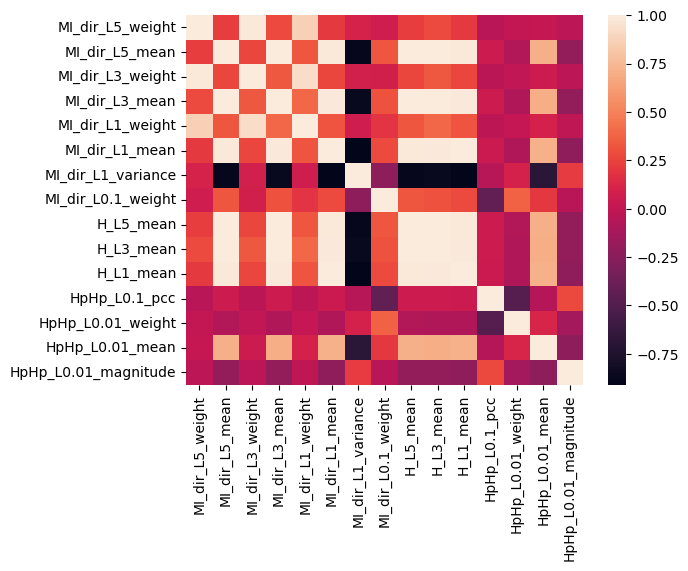

In [44]:
sns.heatmap(et_clean.corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x27551a128f0>,
 'caps': [<matplotlib.lines.Line2D at 0x27551a381c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27551a13ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x27551a38700>],
 'fliers': [<matplotlib.lines.Line2D at 0x27551a389a0>],
 'means': []}

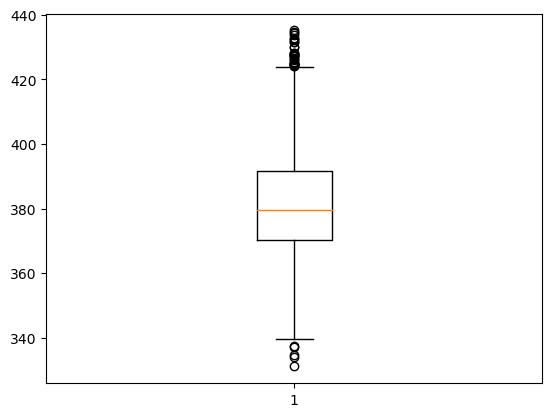

In [45]:
plt.boxplot(et_clean["HpHp_L0.01_magnitude"])

{'whiskers': [<matplotlib.lines.Line2D at 0x275522e7a60>,
 'caps': [<matplotlib.lines.Line2D at 0x275510bf970>,
 'boxes': [<matplotlib.lines.Line2D at 0x275522e60e0>],
 'medians': [<matplotlib.lines.Line2D at 0x275521fd750>],
 'fliers': [<matplotlib.lines.Line2D at 0x275521fe230>],
 'means': []}

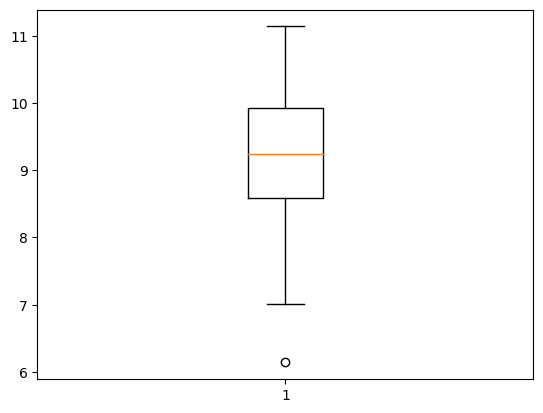

In [46]:
plt.boxplot(et_clean["HpHp_L0.01_weight"])

{'whiskers': [<matplotlib.lines.Line2D at 0x275530a5600>,
 'caps': [<matplotlib.lines.Line2D at 0x27553081000>,
 'boxes': [<matplotlib.lines.Line2D at 0x2755361cd30>],
 'medians': [<matplotlib.lines.Line2D at 0x275530815a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x275530805b0>],
 'means': []}

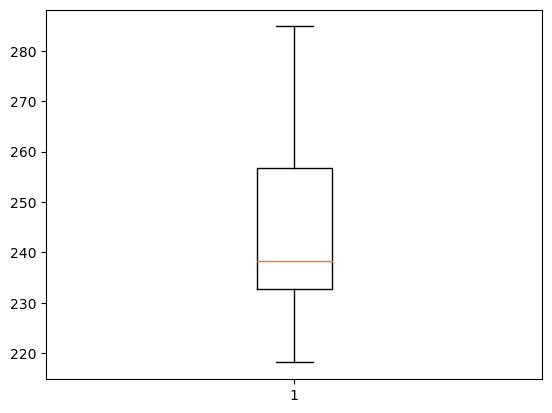

In [47]:
plt.boxplot(et_clean["HpHp_L0.01_mean"])

{'whiskers': [<matplotlib.lines.Line2D at 0x27552543fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x275525427d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27552543e80>],
 'medians': [<matplotlib.lines.Line2D at 0x2755234d150>],
 'fliers': [<matplotlib.lines.Line2D at 0x2755234d390>],
 'means': []}

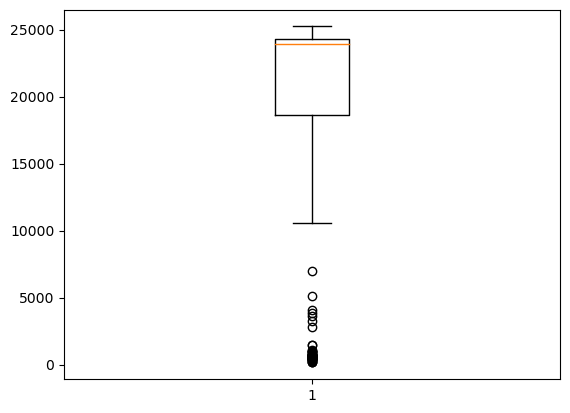

In [48]:
plt.boxplot(et_clean["MI_dir_L1_variance"])

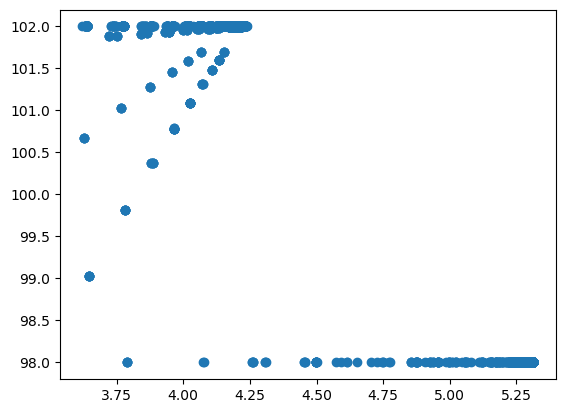

In [49]:
#Scatter plot creation
S = df_clean[['HpHp_L0.01_weight','HpHp_L0.01_mean']]
plt.scatter(S['HpHp_L0.01_weight'],S['HpHp_L0.01_mean'])

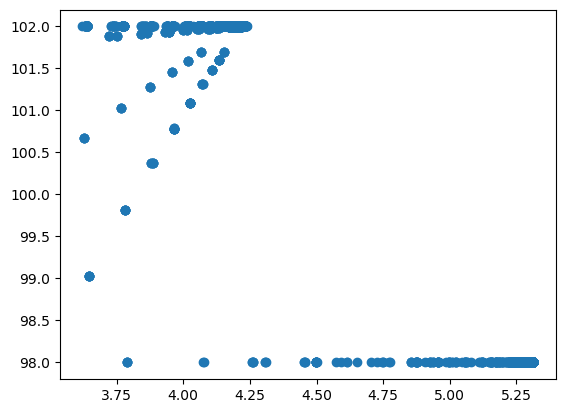

In [50]:
#Scatter plot creation
S = df_clean[['HpHp_L0.01_weight','HpHp_L0.01_mean']]
plt.scatter(S['HpHp_L0.01_weight'],S['HpHp_L0.01_mean'])

In [51]:
from sklearn.preprocessing import normalize
et_scaled = normalize(et)
et_scaled = pd.DataFrame(et_scaled, columns=et.columns)
et_scaled.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,H_L5_mean,H_L3_mean,H_L1_mean,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_magnitude
0,0.005892,0.353523,0.005892,0.353523,0.005892,0.353523,0.000000,0.005892,0.353523,0.353523,0.353523,0.0,0.005892,0.353523,0.353523
1,0.003242,0.356625,0.003242,0.356625,0.003242,0.356625,0.000000,0.003242,0.356625,0.356625,0.356625,0.0,0.004016,0.344133,0.344133
2,0.004802,0.254707,0.005080,0.257537,0.005397,0.260402,0.712355,0.005553,0.254707,0.257537,0.260402,0.0,0.002786,0.217272,0.217272
3,0.001034,0.353562,0.001034,0.353562,0.001034,0.353562,0.000000,0.001034,0.353562,0.353562,0.353562,0.0,0.002572,0.353520,0.353520
4,0.008007,0.289094,0.008555,0.291241,0.009190,0.293581,0.540677,0.009508,0.289094,0.291241,0.293581,0.0,0.007119,0.314747,0.314747


In [52]:
#Ennio Doorbell
ed = pd.read_csv("Detection of IOT Botnet Attacks/Ennio_Doorbell/benign_traffic.csv")
ed

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.00000
1,1.000000,70.000000,0.000000e+00,1.000000,70.000000,0.000000e+00,1.000000,70.000000,0.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,70.000000,0.000000e+00,70.000000,0.000000e+00,0.000000e+00,0.00000
2,1.000023,89.999548,9.039795e-03,1.001631,89.967432,6.503024e-01,1.117713,87.893685,3.768974e+01,1.807388,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,90.000000,0.000000e+00,90.000000,0.000000e+00,0.000000e+00,0.00000
3,1.000000,60.000000,0.000000e+00,1.000000,60.000000,4.550000e-13,1.000091,60.000000,4.550000e-13,1.394277,...,9.090000e-13,0.000000e+00,0.000000e+00,1.911130,60.000000,9.540000e-07,60.000000,9.090000e-13,0.000000e+00,0.00000
4,1.000000,590.000000,0.000000e+00,1.000000,590.000000,0.000000e+00,1.000000,590.000000,0.000000e+00,1.000000,...,5.458555e+01,0.000000e+00,0.000000e+00,4.274029,399.892026,1.050783e+02,399.892026,1.104145e+04,0.000000e+00,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39095,2.999983,90.000000,9.090000e-13,2.999990,90.000000,9.090000e-13,2.999997,89.999998,5.260000e-05,3.933028,...,7.027690e-04,-1.390000e-10,-7.330000e-07,3.829500,88.068732,7.362626e+00,106.663239,5.420919e+01,-3.946403e-01,-0.09502
39096,1.000000,60.000003,8.060000e-05,1.000092,60.002749,8.247239e-02,1.093784,62.572285,7.055189e+01,3.781173,...,9.090000e-13,-1.810000e-30,0.000000e+00,5.144398,60.000000,1.170000e-06,84.852814,1.360000e-12,-1.630000e-29,0.00000
39097,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,9.090000e-13,1.148149,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.00000
39098,1.982943,66.555913,4.224687e+01,1.989731,66.533548,4.224887e+01,1.996565,66.511183,4.224987e+01,2.147754,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,73.000000,0.000000e+00,73.000000,0.000000e+00,0.000000e+00,0.00000


In [53]:
ed.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,39100.000000,39100.000000,3.910000e+04,39100.000000,39100.000000,3.910000e+04,39100.000000,39100.000000,3.910000e+04,39100.000000,...,3.910000e+04,3.910000e+04,3.910000e+04,39100.000000,39100.000000,3.910000e+04,39100.000000,3.910000e+04,3.910000e+04,3.910000e+04
mean,2.002490,82.648591,6.453852e+02,2.063681,81.592516,6.905707e+02,2.332217,81.195846,7.801684e+02,4.210320,...,1.454453e+02,-4.310083e-01,-1.536979e-02,3.204672,84.608589,7.577874e+00,101.485959,3.460268e+02,-3.923064e+00,-1.055612e-01
std,1.270297,31.289001,3.553343e+03,1.457584,25.635094,3.675575e+03,2.389500,19.658593,3.373039e+03,5.109720,...,1.405404e+03,9.409969e+00,1.493938e-01,1.632330,47.538171,1.659916e+01,50.750646,2.367182e+03,6.213299e+01,2.388361e-01
min,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,0.000000e+00,-6.562949e+02,-1.116897e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,-1.275063e+03,-1.129921e+00
25%,1.000000,60.000003,0.000000e+00,1.000063,60.002750,0.000000e+00,1.082484,62.572480,1.080000e-08,2.285727,...,4.550000e-13,-3.780000e-08,-1.220000e-05,1.999984,60.000000,6.740000e-07,84.852814,9.090000e-13,-6.967217e-01,-1.219078e-01
50%,1.993297,89.999999,1.820000e-12,1.997235,89.999462,2.730000e-12,1.999400,89.778277,2.497635e-04,3.319236,...,4.250000e-05,-1.021500e-30,-2.680000e-21,3.481289,83.094764,6.402094e+00,100.659261,4.098794e+01,-3.540000e-29,-2.620000e-17
75%,2.987798,90.000000,1.524328e-03,2.994029,90.000000,3.675151e-01,2.999334,90.000000,7.079936e+01,4.876057,...,3.088043e+00,0.000000e+00,0.000000e+00,3.894291,88.069043,1.110955e+01,106.137631,1.234244e+02,0.000000e+00,0.000000e+00
max,10.254458,590.000000,2.280091e+04,14.503587,590.000000,2.279718e+04,31.515166,590.000000,2.279886e+04,70.185134,...,2.282146e+04,8.530156e+00,6.152173e-01,19.854464,460.973870,1.510000e+02,460.973870,2.334370e+04,2.248136e+03,7.754362e-01


In [54]:
ed = ed[["MI_dir_L5_weight","MI_dir_L5_mean","MI_dir_L3_weight","MI_dir_L3_mean","MI_dir_L1_weight","MI_dir_L1_mean","MI_dir_L0.1_weight","H_L5_mean", "H_L3_mean", "H_L1_mean","HpHp_L0.01_weight","HpHp_L0.01_mean","HpHp_L0.01_magnitude"]]

In [55]:
z = np.abs(stats.zscore(ed))
threshold = 1
ed_clean = ed[(z < threshold).all(axis=1)]
print(ed.shape)
print(ed_clean.shape)

(39100, 13)
(25634, 13)


<Axes: >

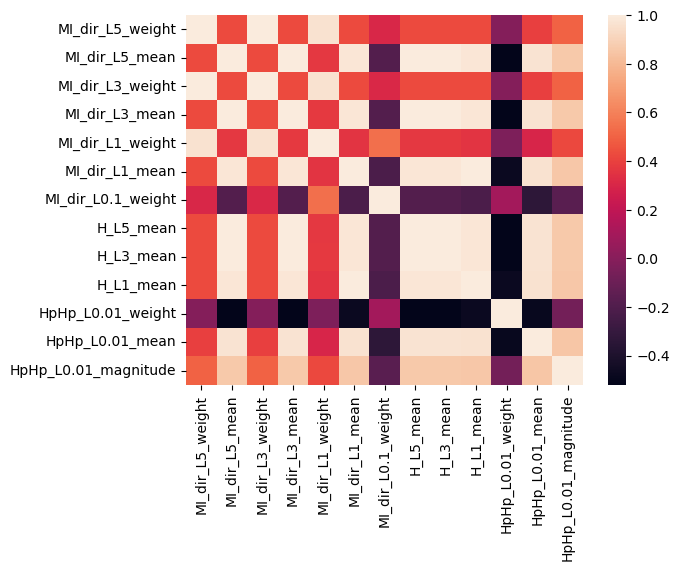

In [56]:
sns.heatmap(ed_clean.corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x2755199dbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2755199e110>,
 'boxes': [<matplotlib.lines.Line2D at 0x2755199d930>,
 'medians': [<matplotlib.lines.Line2D at 0x2755199e650>,
 'fliers': [<matplotlib.lines.Line2D at 0x2755199e8f0>,
 'means': []}

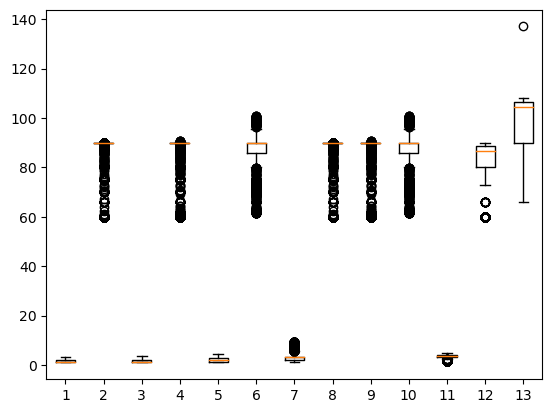

In [57]:
plt.boxplot(ed_clean)

In [58]:
ed.isnull().sum() #Checks for null values

MI_dir_L5_weight        0
MI_dir_L5_mean          0
MI_dir_L3_weight        0
MI_dir_L3_mean          0
MI_dir_L1_weight        0
MI_dir_L1_mean          0
MI_dir_L0.1_weight      0
H_L5_mean               0
H_L3_mean               0
H_L1_mean               0
HpHp_L0.01_weight       0
HpHp_L0.01_mean         0
HpHp_L0.01_magnitude    0
dtype: int64

In [59]:
ed_clean.nunique()

MI_dir_L5_weight         6836
MI_dir_L5_mean           3327
MI_dir_L3_weight         9146
MI_dir_L3_mean           6201
MI_dir_L1_weight        11798
MI_dir_L1_mean           8485
MI_dir_L0.1_weight      22979
H_L5_mean                3327
H_L3_mean                6201
H_L1_mean                8485
HpHp_L0.01_weight       23011
HpHp_L0.01_mean         16466
HpHp_L0.01_magnitude    13819
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2755d5e4be0>,
 'caps': [<matplotlib.lines.Line2D at 0x2755d5e4fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2755d5e4940>],
 'medians': [<matplotlib.lines.Line2D at 0x2755d5e5540>],
 'fliers': [<matplotlib.lines.Line2D at 0x2755d5e57e0>],
 'means': []}

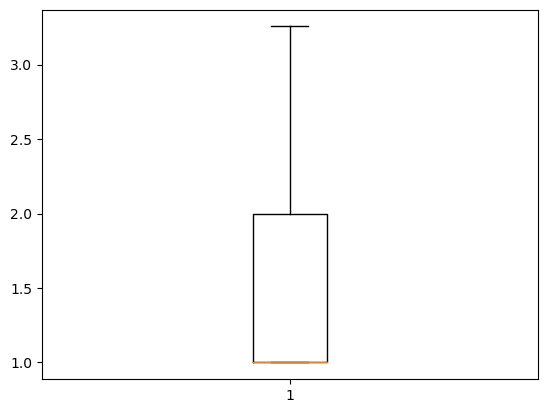

In [60]:
plt.boxplot(ed_clean["MI_dir_L5_weight"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2755d62b070>,
 'caps': [<matplotlib.lines.Line2D at 0x2755d62b5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2755d62add0>],
 'medians': [<matplotlib.lines.Line2D at 0x2755d62baf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2755d62bd90>],
 'means': []}

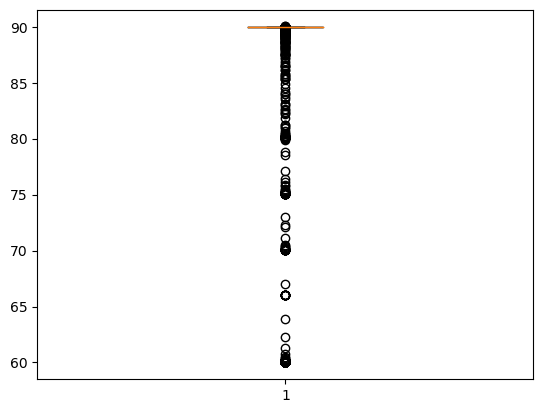

In [61]:
plt.boxplot(ed_clean["MI_dir_L5_mean"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2755d6a25c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2755d6a2b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2755d6a2320>],
 'medians': [<matplotlib.lines.Line2D at 0x2755d6a3040>],
 'fliers': [<matplotlib.lines.Line2D at 0x2755d6a32e0>],
 'means': []}

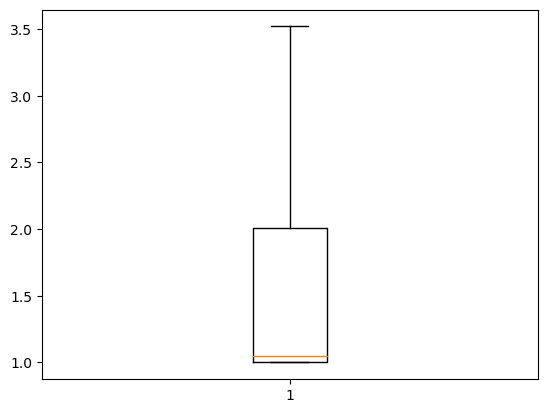

In [62]:
plt.boxplot(ed_clean["MI_dir_L3_weight"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2755d71d6f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2755d71dc30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2755d71d450>],
 'medians': [<matplotlib.lines.Line2D at 0x2755d71e170>],
 'fliers': [<matplotlib.lines.Line2D at 0x2755d71e410>],
 'means': []}

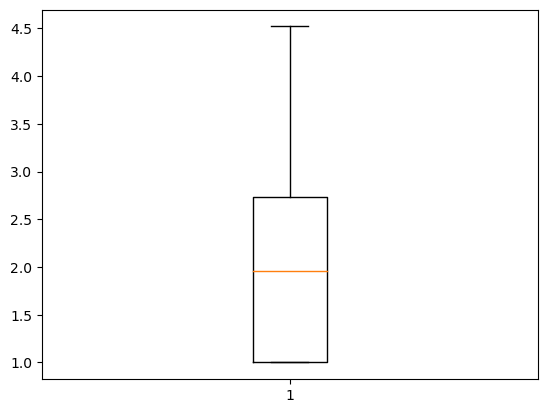

In [63]:
plt.boxplot(ed_clean["MI_dir_L1_weight"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2755d7914b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2755d7919f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2755d791210>],
 'medians': [<matplotlib.lines.Line2D at 0x2755d791f30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2755d7921d0>],
 'means': []}

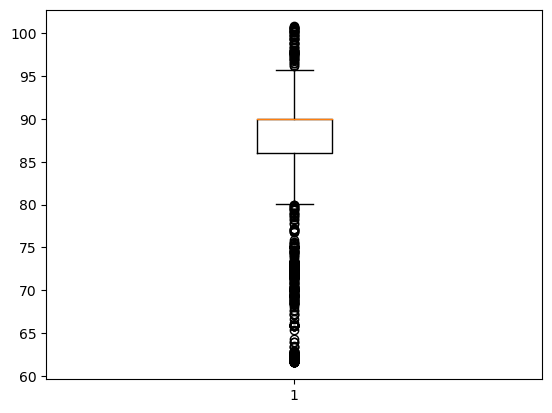

In [64]:
plt.boxplot(ed_clean["MI_dir_L1_mean"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2755d80e1a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2755d80e6e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2755d80df00>],
 'medians': [<matplotlib.lines.Line2D at 0x2755d80ec20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2755d80eec0>],
 'means': []}

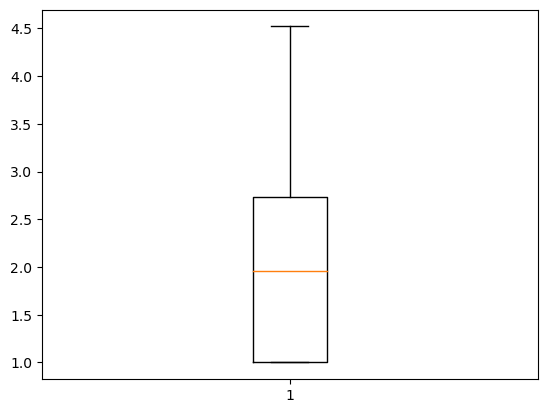

In [65]:
plt.boxplot(ed_clean["MI_dir_L1_weight"])

In [66]:
#Philips B120N10 Baby Monitor
bm = pd.read_csv("Detection of IOT Botnet Attacks/Philips_B120N10_Baby_Monitor/benign_traffic.csv")
bm

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
2,1.000000,342.000000,0.000000e+00,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,...,1.502230e+04,0.000000e+00,0.000000e+00,6.249414,449.603272,1.229111e+02,449.603272,1.510715e+04,0.000000e+00,0.000000e+00
3,1.963325,342.000000,4.370000e-11,1.977831,342.000000,0.000000,1.992555,342.000000,0.000000,1.999253,...,1.481215e+04,0.000000e+00,0.000000e+00,7.248947,434.759286,1.200001e+02,434.759286,1.440002e+04,0.000000e+00,0.000000e+00
4,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175235,1.000037,65.999871,7.726320e-04,1.002900,65.990542,0.056716,1.248509,65.510729,4.249763,9.413446,...,9.090000e-13,9.740000e-31,0.000000e+00,11.276682,66.000000,1.350000e-06,122.331517,5.750000e-12,-3.460000e-28,-1.100000e-16
175236,1.987500,65.999936,3.838900e-04,1.995337,65.995282,0.028314,2.245363,65.728632,2.416210,10.411071,...,3.750000e-12,-3.110000e-29,-1.710000e-17,11.276608,66.000000,1.650000e-06,122.331517,4.550000e-12,8.440000e-29,2.680000e-17
175237,2.987487,65.999957,2.553920e-04,2.995329,65.996857,0.018866,3.245360,65.812249,1.687397,11.411070,...,2.030000e-12,2.400000e-29,1.870000e-17,11.276653,66.000000,9.540000e-07,122.331517,2.030000e-12,3.910000e-29,3.040000e-17
175238,1.000335,66.000000,8.560000e-08,1.012776,65.999960,0.000238,1.526316,65.935258,0.589825,10.513158,...,7.580931e+01,-6.264246e+00,-1.201715e-01,10.786201,69.986695,6.920504e+00,100.453487,7.695840e+01,4.301015e+00,8.007406e-02


In [67]:
bm.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,175240.000000,175240.000000,1.752400e+05,175240.000000,175240.000000,1.752400e+05,175240.000000,175240.000000,175240.000000,175240.000000,...,175240.000000,1.752400e+05,1.752400e+05,175240.000000,175240.000000,175240.000000,175240.000000,175240.000000,175240.000000,175240.000000
mean,2.061955,85.349344,3.827054e+03,2.345781,84.798908,3.978177e+03,3.383597,83.522863,4307.644137,13.292276,...,9428.087385,2.314994e+02,4.415115e-03,20.006219,81.098175,17.686433,138.345506,13924.547197,340.304039,0.059272
std,3.036577,112.139497,3.625879e+04,4.541230,107.704153,3.669703e+04,10.176459,99.890266,35960.125088,26.629416,...,55467.674798,5.328427e+03,1.625200e-01,28.178864,94.778679,48.949188,136.505636,59889.079315,5991.627609,0.182250
min,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000,-1.312975e+05,-1.586467e+00,1.000000,60.000000,0.000000,60.000000,0.000000,-182096.346200,-1.732641
25%,1.000331,66.000000,1.820000e-12,1.009940,66.000000,3.610000e-07,1.379972,66.000035,0.389357,9.599086,...,68.898158,-8.379740e-02,-1.350574e-02,18.163606,66.057859,0.891183,114.378804,187.704604,-0.024575,-0.004557
50%,1.468374,66.000000,3.430000e-05,1.723719,66.000002,1.970062e-02,2.089583,66.168159,9.962614,10.592386,...,144.385102,-2.190000e-14,-9.925000e-10,19.225143,66.845645,3.337537,115.867017,241.065262,1.928935,0.033471
75%,2.038694,66.736720,7.757729e+00,2.331578,69.451354,2.701831e+01,3.057957,72.590379,178.155936,11.777533,...,256.533613,2.574116e-01,1.502138e-02,20.229738,70.993157,18.813396,122.287938,1603.203749,11.357625,0.111060
max,79.311315,1452.697092,4.756482e+05,116.336607,1450.730015,4.714568e+05,216.475253,1434.055603,471317.502200,618.449504,...,501429.704100,1.309683e+05,1.949807e+00,748.248042,1437.325915,681.001223,1438.841936,479066.190100,131186.216600,1.953555


In [68]:
bm = bm[["MI_dir_L5_weight","MI_dir_L5_mean","MI_dir_L3_weight","MI_dir_L3_mean","MI_dir_L1_weight","MI_dir_L1_mean","MI_dir_L0.1_weight","H_L5_mean","H_L5_weight","H_L3_mean","H_L3_weight","H_L1_mean","H_L1_weight","HpHp_L0.1_pcc","HpHp_L0.01_weight","HpHp_L0.01_mean","HpHp_L0.01_magnitude"]]

{'whiskers': [<matplotlib.lines.Line2D at 0x2755d8f5060>,
 'caps': [<matplotlib.lines.Line2D at 0x2755d8f55a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2755d8f4dc0>,
 'medians': [<matplotlib.lines.Line2D at 0x2755d8f5ae0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2755d8f5d80>,
 'means': []}

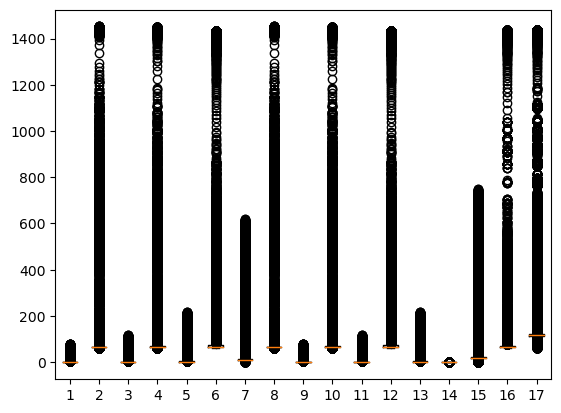

In [69]:
plt.boxplot(bm)

In [70]:
bm.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L0.1_weight,H_L5_mean,H_L5_weight,H_L3_mean,H_L3_weight,H_L1_mean,H_L1_weight,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_magnitude
count,175240.000000,175240.000000,175240.000000,175240.000000,175240.000000,175240.000000,175240.000000,175240.000000,175240.000000,175240.000000,175240.000000,175240.000000,175240.000000,1.752400e+05,175240.000000,175240.000000,175240.000000
mean,2.061955,85.349344,2.345781,84.798908,3.383597,83.522863,13.292276,85.349403,2.061972,84.799084,2.345805,83.523456,3.383640,4.415115e-03,20.006219,81.098175,138.345506
std,3.036577,112.139497,4.541230,107.704153,10.176459,99.890266,26.629416,112.139635,3.036576,107.704587,4.541230,99.891923,10.176459,1.625200e-01,28.178864,94.778679,136.505636
min,1.000000,60.000000,1.000000,60.000000,1.000000,60.000000,1.000000,60.000000,1.000000,60.000000,1.000000,60.000000,1.000000,-1.586467e+00,1.000000,60.000000,60.000000
25%,1.000331,66.000000,1.009940,66.000000,1.379972,66.000035,9.599086,66.000000,1.000331,66.000000,1.009943,66.000035,1.379981,-1.350574e-02,18.163606,66.057859,114.378804
50%,1.468374,66.000000,1.723719,66.000002,2.089583,66.168159,10.592386,66.000000,1.468392,66.000002,1.723760,66.168159,2.089590,-9.925000e-10,19.225143,66.845645,115.867017
75%,2.038694,66.736720,2.331578,69.451354,3.057957,72.590379,11.777533,66.736720,2.038776,69.451354,2.331697,72.590379,3.057965,1.502138e-02,20.229738,70.993157,122.287938
max,79.311315,1452.697092,116.336607,1450.730015,216.475253,1434.055603,618.449504,1452.697092,79.311315,1450.730015,116.336607,1434.055603,216.475253,1.949807e+00,748.248042,1437.325915,1438.841936


In [71]:
z = np.abs(stats.zscore(bm))
print(z)

        MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L3_weight  MI_dir_L3_mean  \
0               0.349722        0.226053          0.296348        0.230251   
1               0.349722        0.226053          0.296348        0.230251   
2               0.349722        2.288680          0.296348        2.388040   
3               0.032481        2.288680          0.081025        2.388040   
4               0.349722        0.226053          0.296348        0.230251   
...                  ...             ...               ...             ...   
175235          0.349710        0.172549          0.295710        0.174630   
175236          0.024520        0.172548          0.077170        0.174586   
175237          0.304795        0.172548          0.143034        0.174572   
175238          0.349612        0.172548          0.293535        0.174543   
175239          0.349720        0.630022          0.296188        0.660477   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L0.1_weight  H

In [72]:
threshold = 1
print(np.where(z > threshold))

(array([     2,      2,      2, ..., 175137, 175138, 175144], dtype=int64), array([ 1,  3,  5, ..., 13, 13, 13], dtype=int64))


In [73]:
bm_clean = bm[(z < threshold).all(axis=1)]

In [74]:
print(bm.shape)
print(bm_clean.shape)

(175240, 17)
(156851, 17)


In [75]:
bm_clean.corr() #Comparing correlations to variables

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L0.1_weight,H_L5_mean,H_L5_weight,H_L3_mean,H_L3_weight,H_L1_mean,H_L1_weight,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_magnitude
MI_dir_L5_weight,1.000000,-0.143921,0.983820,-0.146652,0.847406,-0.150134,0.372315,-0.143921,1.000000,-0.146652,0.983820,-0.150134,0.847406,0.070721,0.145163,-0.203201,0.102124
MI_dir_L5_mean,-0.143921,1.000000,-0.123598,0.995425,-0.059870,0.935088,0.021137,1.000000,-0.143921,0.995425,-0.123598,0.935088,-0.059870,-0.233204,0.065371,0.628520,0.177599
MI_dir_L3_weight,0.983820,-0.123598,1.000000,-0.127690,0.919810,-0.128286,0.436674,-0.123598,0.983820,-0.127690,1.000000,-0.128286,0.919810,0.077277,0.125353,-0.162756,0.083807
MI_dir_L3_mean,-0.146652,0.995425,-0.127690,1.000000,-0.063232,0.956161,0.023783,0.995425,-0.146652,1.000000,-0.127690,0.956161,-0.063232,-0.212151,0.061835,0.627141,0.175708
MI_dir_L1_weight,0.847406,-0.059870,0.919810,-0.063232,1.000000,-0.051026,0.602686,-0.059870,0.847406,-0.063232,0.919810,-0.051026,1.000000,0.077085,0.054977,-0.066798,0.027593
MI_dir_L1_mean,-0.150134,0.935088,-0.128286,0.956161,-0.051026,1.000000,0.077458,0.935088,-0.150134,0.956161,-0.128286,1.000000,-0.051026,-0.168090,0.042766,0.592465,0.159117
MI_dir_L0.1_weight,0.372315,0.021137,0.436674,0.023783,0.602686,0.077458,1.000000,0.021137,0.372315,0.023783,0.436674,0.077458,0.602686,0.010224,-0.050551,0.038132,-0.046740
H_L5_mean,-0.143921,1.000000,-0.123598,0.995425,-0.059870,0.935088,0.021137,1.000000,-0.143921,0.995425,-0.123598,0.935088,-0.059870,-0.233204,0.065371,0.628520,0.177599
H_L5_weight,1.000000,-0.143921,0.983820,-0.146652,0.847406,-0.150134,0.372315,-0.143921,1.000000,-0.146652,0.983820,-0.150134,0.847406,0.070721,0.145163,-0.203201,0.102124
H_L3_mean,-0.146652,0.995425,-0.127690,1.000000,-0.063232,0.956161,0.023783,0.995425,-0.146652,1.000000,-0.127690,0.956161,-0.063232,-0.212151,0.061835,0.627141,0.175708


<Axes: >

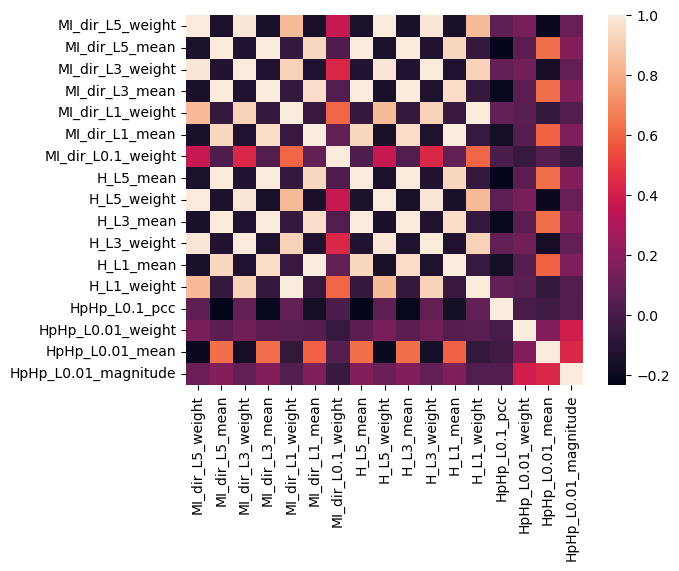

In [76]:
sns.heatmap(bm_clean.corr())

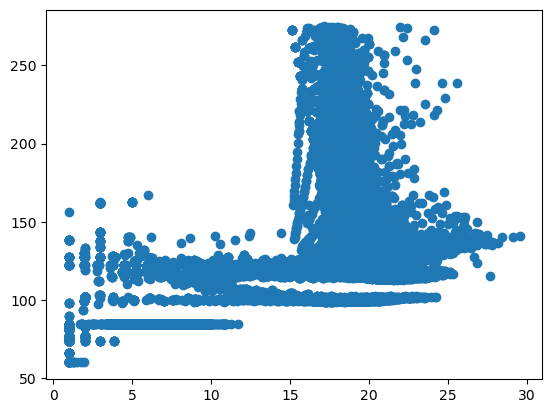

In [77]:
#Scatter plot creation
S = bm_clean[['HpHp_L0.01_weight','HpHp_L0.01_magnitude']]
plt.scatter(S['HpHp_L0.01_weight'],S['HpHp_L0.01_magnitude'])

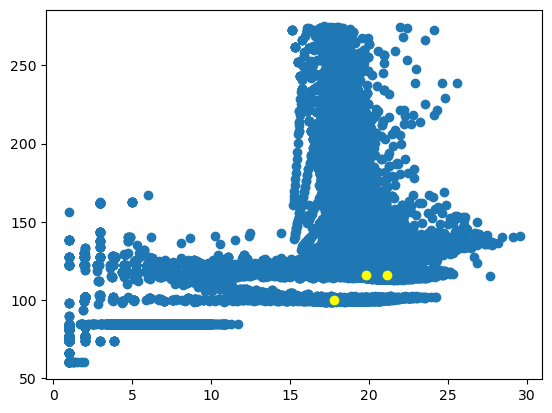

In [78]:
K=3
Centroids = (S.sample(n=K))
plt.scatter(S['HpHp_L0.01_weight'],S['HpHp_L0.01_magnitude'])
plt.scatter(Centroids['HpHp_L0.01_weight'],Centroids['HpHp_L0.01_magnitude'],c='yellow')
plt.show()

In [79]:
import numpy as np
diff = 1
j=0

while(diff!=0):
    XD=S
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['HpHp_L0.01_weight']-row_d['HpHp_L0.01_weight'])**2
            d2=(row_c['HpHp_L0.01_magnitude']-row_d['HpHp_L0.01_magnitude'])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        S[i]=ED
        i=i+1
    C=[]
    for index,row in S.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    S["Cluster"]=C
    Centroids_new = S.groupby(["Cluster"]).mean()[['HpHp_L0.01_magnitude','HpHp_L0.01_weight']]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['HpHp_L0.01_magnitude'] - Centroids['HpHp_L0.01_magnitude']).sum() + (Centroids_new['HpHp_L0.01_weight'] - 
                                                                            Centroids['HpHp_L0.01_weight']).sum()
        print(diff.sum())
    Centroids = S.groupby(["Cluster"]).mean()[['HpHp_L0.01_magnitude','HpHp_L0.01_weight']]

C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

6.426796843217122


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


6.939039274108888


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


19.065817488622045


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


22.111123714669944


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


13.762124768482433


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


6.385796735099605


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


2.778690491797075


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


1.2116897608775794


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


0.35055052553579813


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


0.2499200919142872


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


0.11860684984858239


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


0.16627301990481413


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


0.18108821065168357


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


0.075428921376826


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED
C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


0.01532059564906163


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S[i]=ED


0.0


C:\Users\marl1_22\AppData\Local\Temp\ipykernel_1596\3139687648.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S["Cluster"]=C


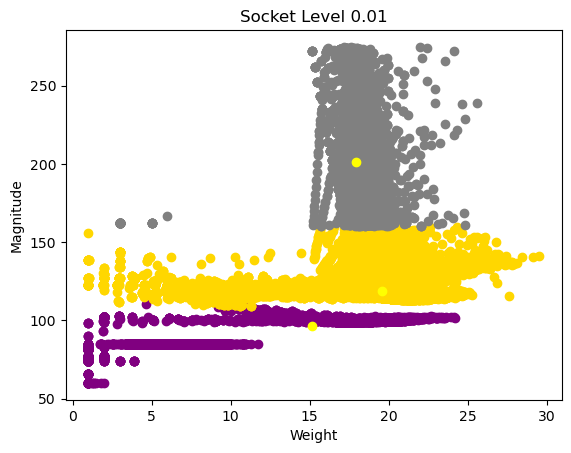

In [80]:
color=['purple','gold','grey']
for k in range(K):
    data=S[S["Cluster"]==k+1]
    plt.scatter(data['HpHp_L0.01_weight'],data['HpHp_L0.01_magnitude'],c=color[k])
plt.scatter(Centroids['HpHp_L0.01_weight'],Centroids['HpHp_L0.01_magnitude'],c='yellow')
plt.title("Socket Level 0.01")
plt.xlabel("Weight")
plt.ylabel("Magnitude")
plt.show()

In [81]:
from sklearn.preprocessing import normalize
bm_scaled = normalize(bm_clean)
bm_scaled = pd.DataFrame(bm_scaled, columns=bm_clean.columns)
bm_scaled.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L0.1_weight,H_L5_mean,H_L5_weight,H_L3_mean,H_L3_weight,H_L1_mean,H_L1_weight,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_magnitude
0,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.0,0.005892,0.353504,0.353504
1,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.0,0.005892,0.353504,0.353504
2,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.0,0.005892,0.353504,0.353504
3,0.010078,0.343702,0.010116,0.343557,0.010154,0.343412,0.010171,0.343702,0.010078,0.343557,0.010116,0.343412,0.010154,0.0,0.005087,0.381489,0.381489
4,0.011616,0.349650,0.012779,0.348319,0.014146,0.347020,0.014836,0.349650,0.011616,0.348319,0.012779,0.347020,0.014146,0.0,0.004972,0.367933,0.367933


In [82]:
bm_scaled = bm_scaled.dropna()
bm_scaled

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L0.1_weight,H_L5_mean,H_L5_weight,H_L3_mean,H_L3_weight,H_L1_mean,H_L1_weight,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_magnitude
0,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.000000e+00,0.005892,0.353504,0.353504
1,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.000000e+00,0.005892,0.353504,0.353504
2,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.353504,0.005892,0.000000e+00,0.005892,0.353504,0.353504
3,0.010078,0.343702,0.010116,0.343557,0.010154,0.343412,0.010171,0.343702,0.010078,0.343557,0.010116,0.343412,0.010154,0.000000e+00,0.005087,0.381489,0.381489
4,0.011616,0.349650,0.012779,0.348319,0.014146,0.347020,0.014836,0.349650,0.011616,0.348319,0.012779,0.347020,0.014146,0.000000e+00,0.004972,0.367933,0.367933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156846,0.004686,0.309247,0.004699,0.309203,0.005850,0.306955,0.044107,0.309247,0.004686,0.309203,0.004699,0.306955,0.005850,0.000000e+00,0.052838,0.309247,0.573192
156847,0.009303,0.308918,0.009339,0.308896,0.010510,0.307648,0.048730,0.308918,0.009303,0.308896,0.009339,0.307648,0.010510,-8.003795e-20,0.052781,0.308918,0.572583
156848,0.013972,0.308664,0.014008,0.308650,0.015178,0.307786,0.053367,0.308664,0.013972,0.308650,0.014008,0.307786,0.015178,8.745492e-20,0.052738,0.308664,0.572112
156849,0.004920,0.324594,0.004981,0.324594,0.007507,0.324275,0.051705,0.324594,0.004920,0.324594,0.004981,0.324275,0.007507,-5.910139e-04,0.053047,0.344201,0.494039


{'whiskers': [<matplotlib.lines.Line2D at 0x2755f7e8c10>,
 'caps': [<matplotlib.lines.Line2D at 0x2755f7e9150>,
 'boxes': [<matplotlib.lines.Line2D at 0x2755f7e8970>],
 'medians': [<matplotlib.lines.Line2D at 0x2755f7e9690>],
 'fliers': [<matplotlib.lines.Line2D at 0x2755f7e9930>],
 'means': []}

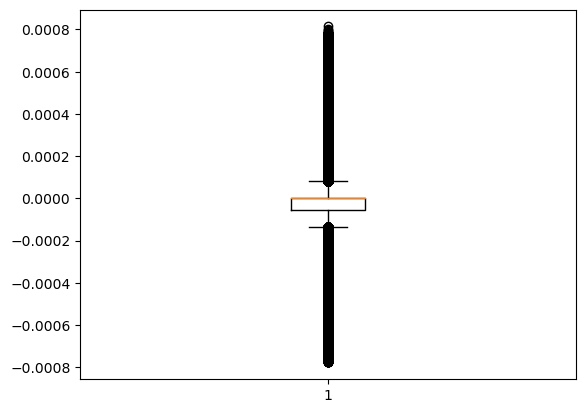

In [83]:
plt.boxplot(bm_scaled["HpHp_L0.1_pcc"])

MemoryError: Unable to allocate 91.6 GiB for an array with shape (12301039675,) and data type float64

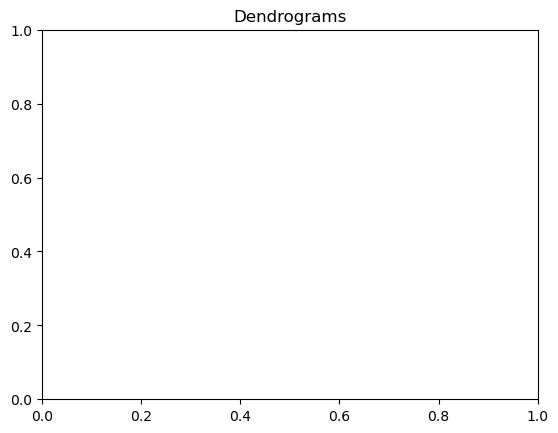

In [84]:
plt.figure()
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(bm_scaled, method='ward'))

In [ ]:
#SimpleHome XCS7 1002 WHT Security Camera
sh = pd.read_csv("Detection of IOT Botnet Attacks/SimpleHome_XCS7_1002_WHT_Security_Camera/benign_traffic.csv")
sh

In [ ]:
z = np.abs(stats.zscore(sh))
print(z)

In [ ]:
threshold = 1
print(np.where(z > threshold))

In [ ]:
sh_clean = sh[(z < threshold).all(axis=1)]

In [ ]:
print(sh.shape)
print(sh_clean.shape)

In [ ]:
sh_clean.corr() #Comparing correlations to variables

In [ ]:
plt.boxplot(sh_clean["MI_dir_L5_weight"])

In [ ]:
plt.boxplot(sh_clean["MI_dir_L5_mean"])

It appears that for this variable, there are two outliers rather than several.

In [ ]:
plt.boxplot(sh_clean["MI_dir_L5_variance"])

In [ ]:
S = sh_clean[["MI_dir_L5_weight","MI_dir_L5_mean"]]
plt.scatter(S['MI_dir_L5_weight'],S['MI_dir_L5_mean'])
#Creating a scatter plot to go into further detail
plt.xlabel("Source MAC-IP Address")

In [ ]:
S = S.loc[(S.MI_dir_L5_weight < 1.8) & (S.MI_dir_L5_mean >80)] #Removing the outliers
plt.scatter(S['MI_dir_L5_weight'],S['MI_dir_L5_mean'])
plt.title("Source MAC-IP Address")

In [ ]:
while(diff!=0):
    XD=S
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['MI_dir_L5_weight']-row_d['MI_dir_L5_weight'])**2
            d2=(row_c['MI_dir_L5_mean']-row_d['MI_dir_L5_mean'])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        S[i]=ED
        i=i+1
    C=[]
    for index,row in S.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    S["Cluster"]=C
    Centroids_new = S.groupby(["Cluster"]).mean()[['MI_dir_L5_mean','MI_dir_L5_weight']]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['MI_dir_L5_mean'] - Centroids['MI_dir_L5_mean']).sum() + (Centroids_new['MI_dir_L5_weight'] - 
                                                                              Centroids['MI_dir_L5_weight']).sum()
        print(diff.sum())
    Centroids = S.groupby(["Cluster"]).mean()[['MI_dir_L5_mean','MI_dir_L5_weight']]

In [ ]:
color=['red','orange','green']
for k in range(K):
    data=S[S["Cluster"]==k+1]
    plt.scatter(data['MI_dir_L5_weight'],data['MI_dir_L5_mean'],c=color[k])
plt.scatter(Centroids['MI_dir_L5_weight'],Centroids['MI_dir_L5_mean'],c='yellow')
plt.title("Source MAC-IP Level 5")
plt.xlabel("Weight")
plt.ylabel("Mean")
plt.show()

In [ ]:
#SimpleHome XCS7 1003 WHT Security Camera
sh1003 = pd.read_csv("Detection of IOT Botnet Attacks/SimpleHome_XCS7_1003_WHT_Security_Camera/benign_traffic.csv")
sh1003

In [ ]:
sh1003.describe()

In [ ]:
sns.pairplot(sh1003)

In [ ]:
plt.boxplot(sh1003["MI_dir_L5_mean"])

In [ ]:
plt.boxplot(sh1003["MI_dir_L3_mean"])

In [ ]:
plt.boxplot(sh1003["MI_dir_L1_mean"])

In [ ]:
#Comparing means
mean = sh1003[['MI_dir_L5_mean','MI_dir_L3_mean','MI_dir_L1_mean','H_L5_mean','H_L3_mean','H_L1_mean']]
sns.heatmap(mean.corr())

In [ ]:
#Comparing weights
weight = sh1003[['MI_dir_L5_weight','MI_dir_L3_weight','MI_dir_L1_weight','H_L5_weight','H_L3_weight','HpHp_L0.01_weight']]
sns.heatmap(weight.corr())

In [ ]:
#Comparing Level 5 
level5 = sh1003[['MI_dir_L5_mean', 'MI_dir_L5_weight','MI_dir_L5_variance','H_L5_mean','H_L5_weight','H_L5_variance']]
sns.heatmap(level5.corr())

In [ ]:
#Scatter plot creation
L5 = df[['MI_dir_L5_weight','MI_dir_L5_mean']]
plt.scatter(L5['MI_dir_L5_weight'],L5['MI_dir_L5_mean'])

In [ ]:
L5 = L5.loc[(L5.MI_dir_L5_mean < 100) & (L5.MI_dir_L5_weight < 7)] #Removing the outliers
plt.scatter(L5['MI_dir_L5_weight'],L5['MI_dir_L5_mean'])

In [ ]:
#
#K=3
#Centroids = (X.sample(n=K))
#plt.scatter(X["BounceRates"],X["ExitRates"])
#plt.scatter(Centroids["BounceRates"],Centroids["ExitRates"],c='red')
#plt.show()